In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [2]:
def f(a, b, c, x):
    return a*x**2 + b*np.cos(c*x*np.pi)

def initial_x():
    a = min(max(rnd.randn()*5, -10), 10)
    b = min(max(rnd.randn()*5, -10), 10)
    c = min(max(rnd.randn()*5, -10), 10)
    return [a, b, c]

def initial_sigma():
    s_a = rnd.randn()
    s_b = rnd.randn()
    s_c = rnd.randn()
    return [s_a, s_b, s_c]

In [3]:
pop_size = 100
mutations_count = 5
eps = 1e-3

In [4]:
# Adding mutated to the population
tau_1 = 1/np.sqrt(2*pop_size)
tau_2 = 1/np.sqrt(2*np.sqrt(pop_size))

def mutate(P):
    offspring = []
    for mutation in range(0, mutations_count):
        mutated = []
        for i in range(0, pop_size):
            rnd_tau = rnd.randn()*tau_1;
            v = np.array(P[i])
            a = v[0] + rnd.randn()*v[3]
            b = v[1] + rnd.randn()*v[4]
            c = v[2] + rnd.randn()*v[5]
            s_a = v[3] * np.exp(rnd_tau) * np.exp(rnd.randn()*tau_2)
            s_b = v[4] * np.exp(rnd_tau) * np.exp(rnd.randn()*tau_2)
            s_c = v[5] * np.exp(rnd_tau) * np.exp(rnd.randn()*tau_2)
            mutated.append([a, b, c, s_a, s_b, s_c])
        offspring += mutated
    return offspring

In [5]:
# Reducing the population to its original size with the smallest MSE
dataset_num = 19
data = np.loadtxt('ES_data_' + str(dataset_num) + '.dat')
data_x = [datapoint[0] for datapoint in data]
data_y = [datapoint[1] for datapoint in data]

def evaluate(P):
    error = {}
    for i in range(0, len(P)):
        v = np.array(P[i])
        estimated_y = [f(v[0], v[1], v[2], x) for x in data_x]
        error[i] = np.sum([(estimated_y[i] - data_y[i])**2 for i in range(0, len(data_y))])/len(data_y)
    # Sorting the dictionary by values
    error = {index: error for (index, error) in sorted(error.items(), key = lambda pair: pair[1])}
    return error

In [6]:
# Initialize P
P = [initial_x() + initial_sigma() for i in range(0, pop_size)]

In [7]:
%%time
# Iterate over genarations
iteration = 0
lastError = 0
while(True):
    O = mutate(P)
    bestParent = list(evaluate(P).values())[0]
    bestOffspring = list(evaluate(O).values())[0]
    P = O + P;
    P = [P[i] for i in list(evaluate(P).keys())[:pop_size]]
    lastError = list(evaluate(P).values())[0]
    iteration += 1
    
    if abs(bestParent - bestOffspring) < eps:
        break
print(iteration)

53
CPU times: user 1min 37s, sys: 212 ms, total: 1min 37s
Wall time: 1min 42s


In [8]:
abs(bestParent - bestOffspring)

0.0004464589622766857

In [9]:
# The best estimated coefficients
a, b, c = P[0][:3]

(5.236080500939752, -7.817234762895508, 1.4587023934962766)

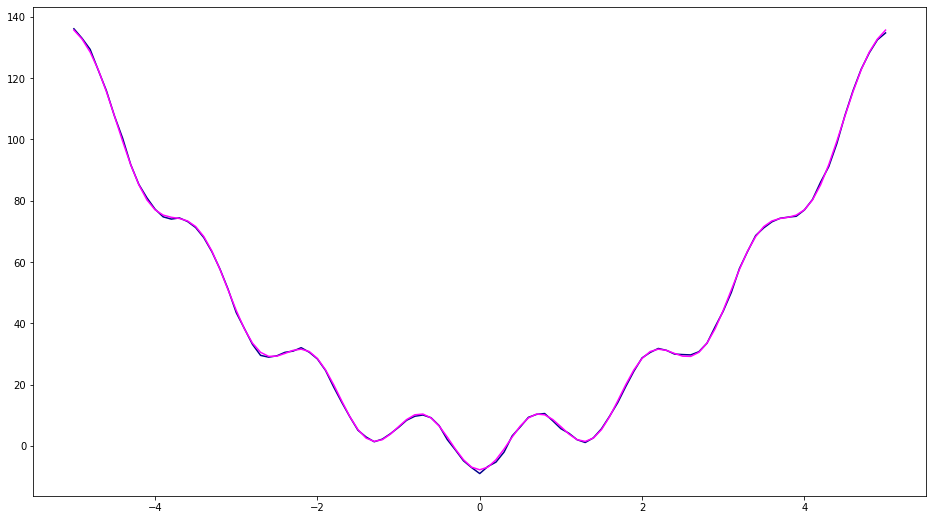

In [10]:
# Plotting estimated and measured values
estimated_y = [f(a, b, c, x) for x in data_x]
errors = [estimated_y[i] - data_y[i] for i in range(0, len(data_y))]

plt.figure(figsize = (16, 9))
plt.plot(data_x, data_y, color = 'darkblue')
plt.plot(data_x, estimated_y, color = 'magenta')
(a, b, c)

0.18788589757470814

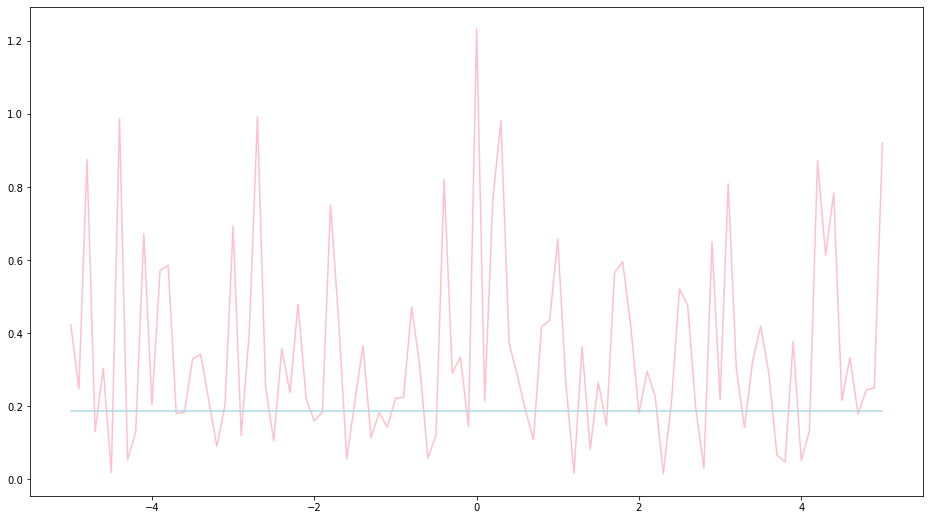

In [11]:
plt.figure(figsize = (16, 9))
plt.plot(data_x, [abs(error) for error in errors], color = 'pink')
plt.plot(data_x, [lastError for x in data_x], color = 'lightblue')
lastError